In [1]:
%matplotlib inline

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

import networkx as nx
from networkx.algorithms import community

In [3]:
import os
os.environ["PROJ_LIB"] = r"C:\\Users\\user1\\Anaconda3\\Library\\share"

In [5]:
earthquake_data = pd.read_csv("earthquakes.csv")

In [6]:
earthquake_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
earthquake_data.shape

(23412, 21)

In [9]:
earthquake_data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [10]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]
]

In [11]:
earthquake_data.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.246,145.616,6.0,131.6
1,01/04/1965,11:29:49,1.863,127.352,5.8,80.0
2,01/05/1965,18:05:58,-20.579,-173.972,6.2,20.0
3,01/08/1965,18:49:43,-59.076,-23.557,5.8,15.0
4,01/09/1965,13:32:50,11.938,126.427,5.8,15.0


In [12]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

In [13]:
earthquake_data.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Magnitude           float64
Depth               float64
DateTime     datetime64[ns]
dtype: object

In [14]:
earthquake_data = earthquake_data.drop(["Date", "Time"], axis = 1)

In [15]:
earthquake_data.head()

,Latitude,Longitude,Magnitude,Depth,DateTime
0,19.246,145.616,6.0,131.6,1965-01-02 13:44:18
1,1.863,127.352,5.8,80.0,1965-01-04 11:29:49
2,-20.579,-173.972,6.2,20.0,1965-01-05 18:05:58
3,-59.076,-23.557,5.8,15.0,1965-01-08 18:49:43
4,11.938,126.427,5.8,15.0,1965-01-09 13:32:50


In [16]:
earthquake_data.DateTime.min(), earthquake_data.DateTime.max()

(Timestamp('1965-01-02 13:44:18'), Timestamp('2016-12-30 20:08:28'))

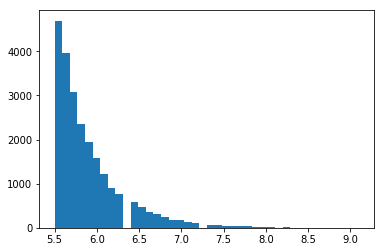

In [17]:
plt.hist(earthquake_data.Magnitude, bins = 40)
plt.show()

In [18]:
earthquake_data[earthquake_data.Magnitude == earthquake_data.Magnitude.max()]

,Latitude,Longitude,Magnitude,Depth,DateTime
17083,3.295,95.982,9.1,30.0,2004-12-26 00:58:53
20501,38.297,142.373,9.1,29.0,2011-03-11 05:46:24


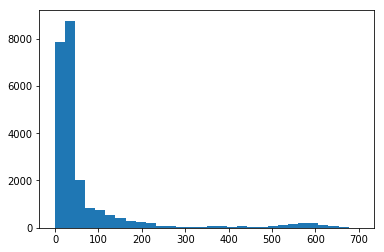

In [19]:
plt.hist(earthquake_data.Depth, bins = 30)
plt.show()

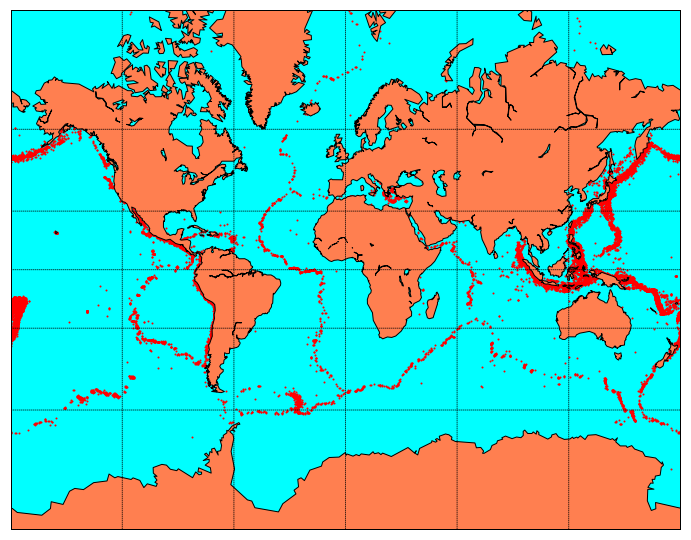

In [22]:
figure = plt.figure(figsize=(12, 10))
counter_axis = figure.add_subplot(111)

m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines(ax = counter_axis)
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

earthquake_x, earthquake_y = m(earthquake_data.Longitude.tolist(), earthquake_data.Latitude.tolist())
m.scatter(earthquake_x, earthquake_y, color = "red", s = 1)
plt.show()

In [23]:
volcano_data = pd.read_csv("volcanos.csv")

In [24]:
volcano_data.shape

(1508, 12)

In [25]:
volcano_data.dtypes

Number                   int64
Name                    object
Country                 object
Region                  object
Type                    object
Activity Evidence       object
Last Known Eruption     object
Latitude               float64
Longitude              float64
Elevation (Meters)       int64
Dominant Rock Type      object
Tectonic Setting        object
dtype: object

In [26]:
volcano_data.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [27]:
volcano_x, volcano_y = m(volcano_data.Longitude.tolist(), volcano_data.Latitude.tolist())

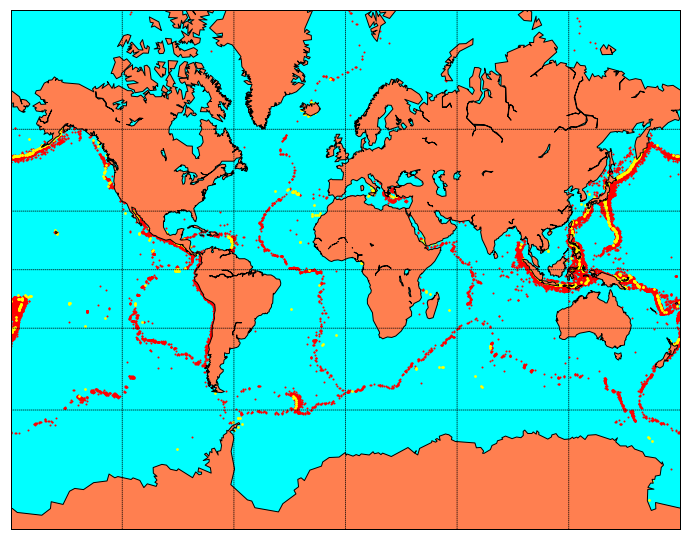

In [63]:
figure = plt.figure(figsize=(12, 10))
counter_axis = figure.add_subplot(111)

m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines(ax = counter_axis)
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 60))
m.drawmapboundary(fill_color = "aqua")

earthquake_x, earthquake_y = m(earthquake_data.Longitude.tolist(), earthquake_data.Latitude.tolist())
volcano_x, volcano_y = m(volcano_data.Longitude.tolist(), volcano_data.Latitude.tolist())

m.scatter(earthquake_x, earthquake_y, color = "red", s = 1)
m.scatter(volcano_x, volcano_y, color = "yellow", s = 3)

plt.show()

In [28]:
ufos = pd.read_csv("ufo_sightings_scrubbed.csv", low_memory = False)
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos.columns = ["datetime", "country", "state", "latitude", "longitude"]
ufos = ufos[ufos.country == "us"]

In [29]:
ufos.head()

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333


In [30]:
ufos.dtypes

datetime      object
country       object
state         object
latitude      object
longitude    float64
dtype: object

In [31]:
ufos.latitude = ufos.latitude.astype("float")

In [32]:
ufos.dtypes

datetime      object
country       object
state         object
latitude     float64
longitude    float64
dtype: object

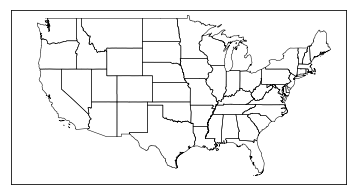

In [33]:
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("st99_d00", "states", drawbounds = True)

In [34]:
state_names = pd.read_csv("states.csv")
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}

ufos.state.replace(state_names_dict, inplace = True)

In [35]:
num_sightings_by_state = ufos.groupby("state").count().datetime

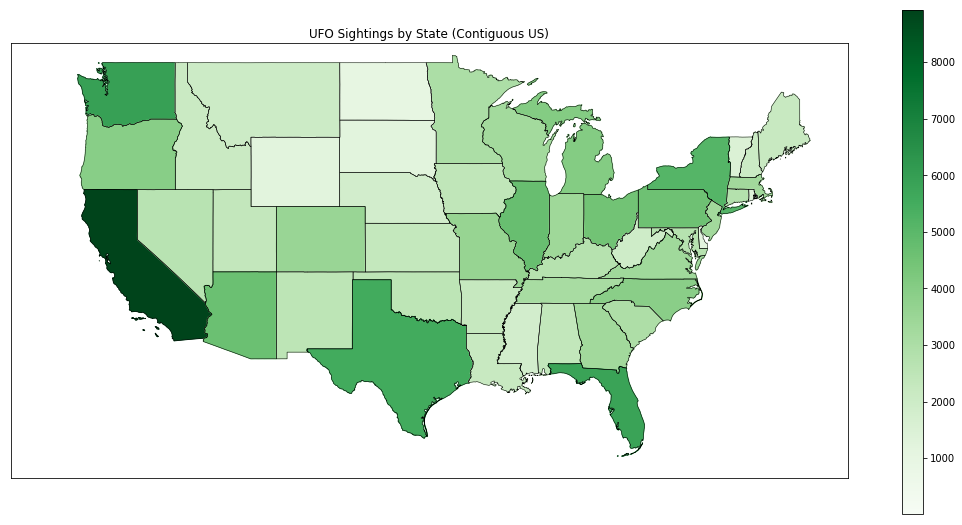

In [36]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

for shape_dict in m.states_info:
  state_name = shape_dict["NAME"]
  # Skip DC and Puerto Rico
  if state_name not in ["District of Columbia", "Puerto Rico"]:
    sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
    colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
  state_names.append(state_name)
ax = plt.gca()

for nshape, seg in enumerate(m.states):
  # Skip DC and Puerto Rico
  if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
    color = rgb2hex(colors[state_names[nshape]])
    poly = Polygon(seg, facecolor = color, edgecolor = color)
    ax.add_patch(poly)
    
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap, norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()

In [38]:
g = nx.Graph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

C:\Users\user1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


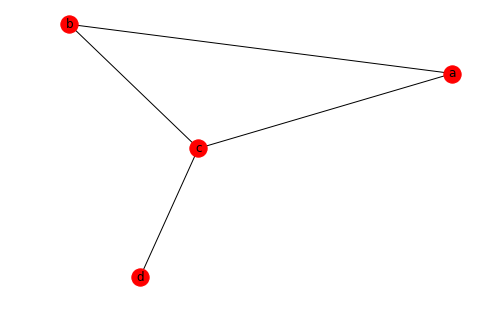

In [39]:
nx.draw(g, with_labels = True)
plt.show()

In [43]:
g.nodes()

NodeView(('a', 'b', 'c', 'd'))

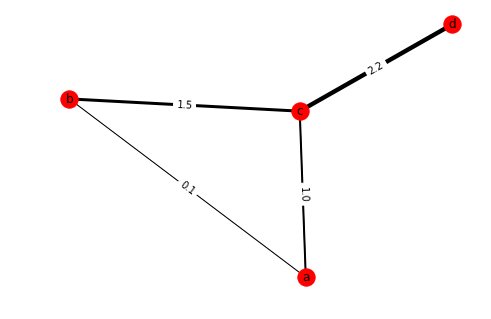

In [46]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()

In [47]:
print(nx.shortest_path(g, "b", "d"), nx.shortest_path_length(g, "b", "d"))
print(nx.shortest_path(g, "b", "d", weight = "weight"), nx.shortest_path_length(g, "b", "d", weight = "weight"))

['b', 'c', 'd'] 2
['b', 'a', 'c', 'd'] 3.3000000000000003


In [48]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

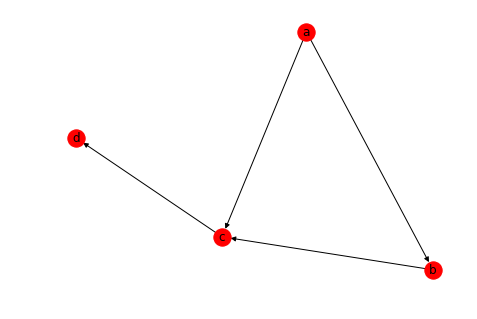

In [50]:
nx.draw(g, with_labels = True)
plt.show()

In [49]:
print(nx.shortest_path(g, "b", "d")) # ['b', 'c', 'd']
print(nx.shortest_path(g, "d", "b")) # Error: No path between d and b.

['b', 'c', 'd']


NetworkXNoPath: No path between d and b.

In [52]:
facebook_graph = nx.read_edgelist("facebook_combined.txt")
print(len(facebook_graph.nodes)) # 4039
print(len(facebook_graph.edges)) # 88234

4039
88234


C:\Users\user1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


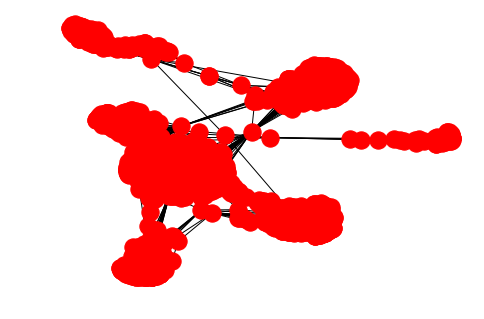

In [59]:
nx.draw(facebook_graph)
plt.show()

In [55]:
karate_graph = nx.karate_club_graph()
centrality = nx.betweenness_centrality(karate_graph)
# Returns a dictionary

level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})


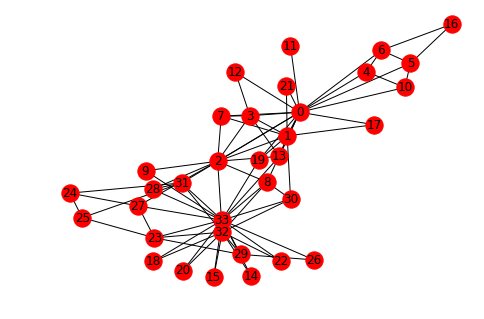

In [58]:
nx.draw(karate_graph, with_labels=True)
communities_generator = community.girvan_newman(karate_graph)
for i in range(1, 4):
  communities = next(communities_generator)
  print("level " + str(i), communities)